<a href="https://colab.research.google.com/github/ShiniyaBenny/OIBSIP/blob/main/project_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

**Import Required Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


**Load the Dataset**

In [ ]:
url = "/content/cars.csv"
df = pd.read_csv(url)
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Dimensions.Height                                5076 non-null   int64 
 1   Dimensions.Length                                5076 non-null   int64 
 2   Dimensions.Width                                 5076 non-null   int64 
 3   Engine Information.Driveline                     5076 non-null   object
 4   Engine Information.Engine Type                   5076 non-null   object
 5   Engine Information.Hybrid                        5076 non-null   bool  
 6   Engine Information.Number of Forward Gears       5076 non-null   int64 
 7   Engine Information.Transmission                  5076 non-null   object
 8   Fuel Information.City mpg                        5076 non-null   int64 
 9   Fuel Information.Fuel Type               

In [ ]:
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


**Feature Selection**

In [ ]:
features = [
    "Dimensions.Height",
    "Dimensions.Length",
    "Dimensions.Width",
    "Engine Information.Number of Forward Gears",
    "Engine Information.Engine Statistics.Horsepower",
    "Engine Information.Engine Statistics.Torque",
    "Identification.Year"
]
target = "Fuel Information.City mpg"

In [ ]:
# Step 4: Define Independent (X) and Dependent (y) Variables
X = df[features]
y = df[target]
X.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Identification.Year
0,140,143,202,6,250,236,2009
1,140,143,202,6,200,207,2009
2,140,143,202,6,200,207,2009
3,140,143,202,6,200,207,2009
4,140,143,202,6,200,207,2009


**Split Data into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (4060, 7)
Testing Set Size: (1016, 7)


**Train the Multiple Linear Regression Model**

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Make Predictions**

In [ ]:

y_pred = model.predict(X_test)
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predictions_df.head())

      Actual  Predicted
842       23  21.064503
4832      21  20.527291
33        10  13.056419
4761      23  20.943775
1491      19  19.587557


**Evaluate Model Performance**

In [ ]:
# Step 8: Evaluate Model Performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.6086397218401809
Mean Squared Error: 7.945124032833856


**Model Coefficients**

In [ ]:

print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")

print("\nIntercept:", model.intercept_)



Model Coefficients:
Dimensions.Height: 0.0073
Dimensions.Length: 0.0000
Dimensions.Width: -0.0002
Engine Information.Number of Forward Gears: 0.7038
Engine Information.Engine Statistics.Horsepower: -0.0056
Engine Information.Engine Statistics.Torque: -0.0289
Identification.Year: 0.2916

Intercept: -564.533503011297


**Visualization (Actual vs Predicted)**


Intercept: -564.533503011297


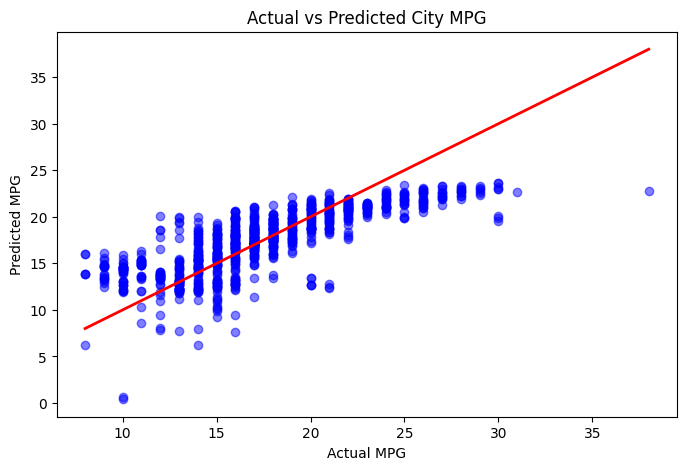

In [ ]:
print("\nIntercept:", model.intercept_)

# Step 11: Visualization (Actual vs Predicted)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=2)  # 45-degree line
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted City MPG")
plt.show()

**Heatmap Visualization**

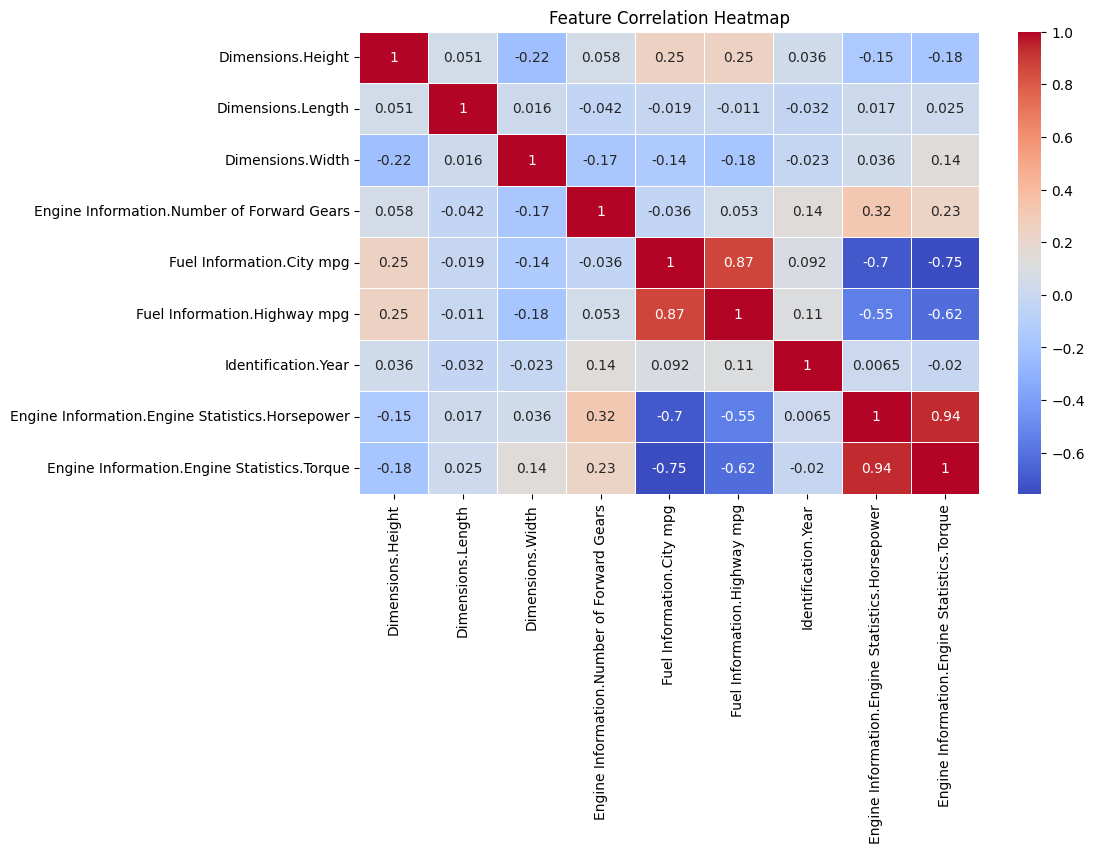

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**3D Scatter Plot**

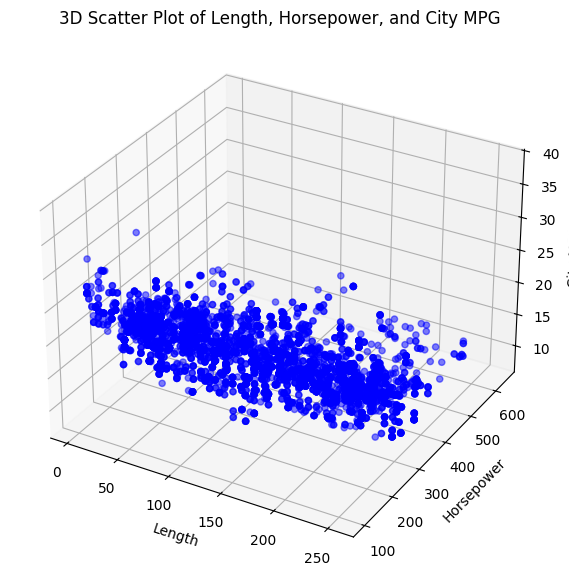

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
target = "Fuel Information.City mpg"
ax.scatter(df["Dimensions.Length"], df["Engine Information.Engine Statistics.Horsepower"], df[target], c='b', marker='o', alpha=0.5)
ax.set_xlabel("Length")
ax.set_ylabel("Horsepower")
ax.set_zlabel("City MPG")
ax.set_title("3D Scatter Plot of Length, Horsepower, and City MPG")
plt.show()

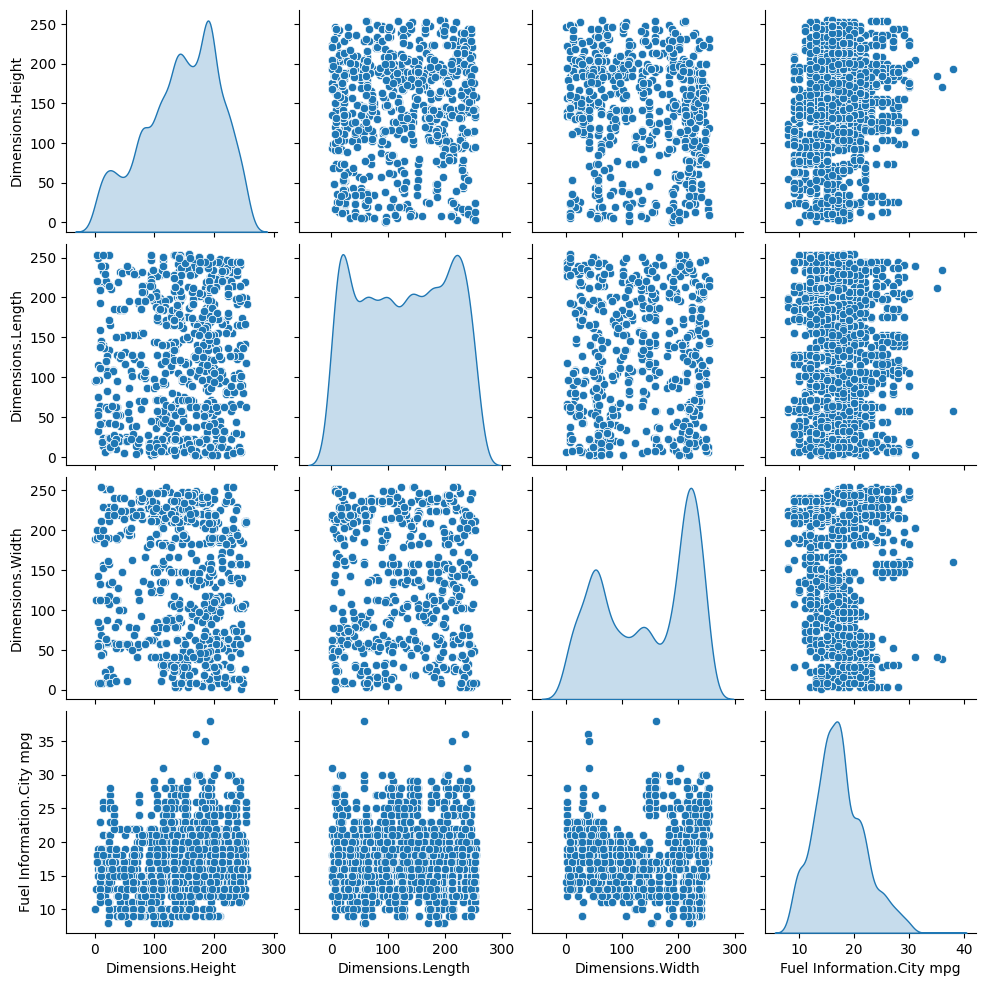

In [ ]:
sns.pairplot(df, vars=["Dimensions.Height", "Dimensions.Length", "Dimensions.Width", "Fuel Information.City mpg"], diag_kind="kde")
plt.show()

**Final Conclusion**

In this project, we explored Multiple Linear Regression (MLR) to predict City MPG (fuel efficiency) based on various vehicle attributes. The model provided useful insights into how different factors such as vehicle dimensions, horsepower, torque, and transmission type influence fuel consumption.

**Key Findings:**

✅ Engine horsepower and torque negatively impact fuel efficiency, indicating that higher-powered engines consume more fuel.
✅ The number of forward gears has a positive influence on MPG, meaning vehicles with more gears tend to be more fuel-efficient.
✅ Newer model years generally show better MPG, likely due to advancements in automotive technology and fuel efficiency improvements.
✅ The model achieved an R² score of 0.6086, suggesting moderate predictive power but leaving room for improvement.

**Future Enhancements:**

🚀 Feature Engineering: Adding new features like weight, aerodynamics, or hybrid/electric classification could enhance predictions.
📈 Exploring Non-Linear Models: Polynomial Regression, Decision Trees, or Random Forest models could improve accuracy.
🔍 Hyperparameter Tuning: Optimizing model parameters and using feature selection techniques to reduce noise in the data.

**Final Thought:**

This project provided a great learning experience in exploratory data analysis (EDA), feature selection, model evaluation, and visualization. While the model performs reasonably well, further refinements using advanced ML algorithms and data augmentation could enhance its accuracy.

This analysis contributes to a better understanding of vehicle fuel efficiency trends and can be applied in real-world scenarios such as automobile design, fuel economy improvements, and sustainability research. 🚗💡